In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# reading and shuffling the data
difference = 0
df = pd.read_csv("FoDS-A1.csv")
df = df.sample(frac = 1)

In [3]:
# normalising the data values

myData = (df - df.min()) / (df.max() - df.min())
X = myData.iloc[:, :-1]
y = myData.iloc[:, -1:]

In [4]:
# splitting the dataset into training data and testing data

splitData = int(0.7 * len(myData))
train_X, test_X, train_y, test_y = X[:splitData], X[splitData:], y[:splitData], y[splitData:]

iter_value = 300
iter_value+=1
skip_num=10
iter_scaled= int(((iter_value-1)/skip_num)+1)
coeff_list = np.zeros((10, 10, 10))
error_array = np.zeros((10, iter_scaled))

In [5]:
def randomiseMatrix(deg):
    A = np.zeros((deg+1, deg+1))
    for m in range(deg+1):
            for n in range(deg+1-m):
                A[m][n] = np.random.randn()                 # assigning random values for weights
    return A            

In [6]:
def GD(deg, X, y, learning_rate, iterations):
    
    A = randomiseMatrix(deg)
                
    for itr in range(iterations):
        sumItrError = 0
        eachIFErrorList = []

        for z in range(len(X)):                           # for each row in input data
            row = X.iloc[z]                                     # contains strength, temperature
            column = y.iloc[z]                              # contains pressure
            eachIFError = 0                                  # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    eachIFError += A[m][n]*(row[0]**m) * (row[1]**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            eachIFError -= column[0]                    # (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) - yn 
            eachIFErrorList.append(eachIFError)
            sumItrError +=  (eachIFError**2)*0.5              


        for m in range(deg+1):
            for n in range(deg+1-m): 
                subSum = 0
                for z in range(len(X)):
                    row = X.iloc[z]
                    subSum += eachIFErrorList[z] * (row[0]**m) * (row[1]**n)
                A[m][n] -= (learning_rate/len(X))  * subSum

        if(itr%skip_num == 0):
            index = int(itr/skip_num)
            error_array[deg][index] = sumItrError

        if(itr == iterations - 1): 
            print("Error at the end of iteration of degree ", deg, " is:  " ,sumItrError)   
            for m in range(deg+1):                   # power of x1
                for n in range(deg+1-m):
                    coeff_list[deg][m][n] = A[m][n]
    return sumItrError


Error at the end of iteration of degree  0  is:   65.80647619047618

Error values after each 10 complete iterations : 
[1506.0229796266626, 240.90318056437533, 87.09414773808959, 68.39456008125718, 66.12112677171669, 65.84473035550856, 65.8111270038856, 65.80704162081157, 65.80654493360463, 65.80648454803588, 65.8064772065602, 65.80647631400873, 65.80647620549418, 65.80647619230216, 65.80647619069799, 65.80647619050251, 65.80647619047953, 65.80647619047623, 65.80647619047689, 65.80647619047616, 65.8064761904757, 65.80647619047728, 65.8064761904758, 65.80647619047647, 65.80647619047583, 65.80647619047637, 65.80647619047573, 65.80647619047657, 65.80647619047662, 65.80647619047633, 65.80647619047618]


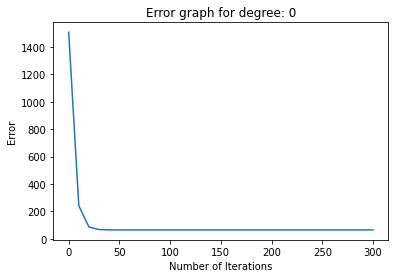

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  1  is:   51.39032862377603

Error values after each 10 complete iterations : 
[100.27768885621393, 76.19608087635761, 74.15420136093974, 72.97467241360725, 71.8732462099921, 70.81563273234816, 69.79595238361713, 68.81009542733455, 67.85462464554732, 66.92663561560967, 66.02366850368618, 65.14363540958546, 64.28475969499155, 63.44552528662989, 62.624634312047014, 61.820971697195525, 61.03357558057954, 60.26161258714207, 59.50435716248518, 58.76117429953335, 58.03150509963051, 57.314854701864455, 56.6107821911088, 55.91889215935742, 55.238827648460365, 54.57026424710152, 53.912905152229364, 53.26647703637609, 52.6307265883812, 52.00541761683715, 51.39032862377603]


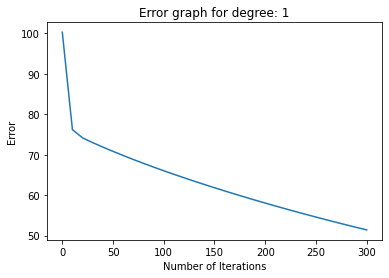

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  2  is:   60.91422813880712

Error values after each 10 complete iterations : 
[1650.7525676432695, 155.07813492758558, 129.48908718273887, 125.46258339082983, 121.8756441163069, 118.41472513548153, 115.07028398119316, 111.83769007340032, 108.71275099925793, 105.69156768240205, 102.77047617194701, 99.9460069702673, 97.21485589292462, 94.57386291910791, 92.01999659431054, 89.55034230030674, 87.16209322765985, 84.85254324529572, 82.61908110984243, 80.45918562886789, 78.3704215105826, 76.35043571438223, 74.3969541731649, 72.5077787974126, 70.6807846980637, 68.91391758387032, 67.20519130188298, 65.55268549864687, 63.95454338591478, 62.40896959898884, 60.91422813880712]


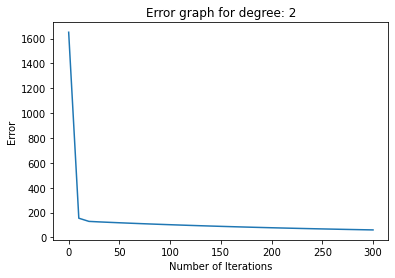

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  3  is:   26.772998379188216

Error values after each 10 complete iterations : 
[1929.6233998586908, 83.21456532668563, 55.74164497650353, 46.52428542758755, 41.057367104476675, 37.718977184727144, 35.61685738527598, 34.23581574717305, 33.27807122312555, 32.57137175632735, 32.01595122177139, 31.553906451187768, 31.15151755125881, 30.789040512461195, 30.454813660987888, 30.14185455931767, 29.84589469595599, 29.56424425527368, 29.295136131225366, 29.03734664319814, 28.789976023684474, 28.552321171608217, 28.32380169807995, 28.10391676369701, 27.892219716157825, 27.688303027019497, 27.49178919593616, 27.30232512055607, 27.119578486692472, 26.943235343328247, 26.772998379188216]


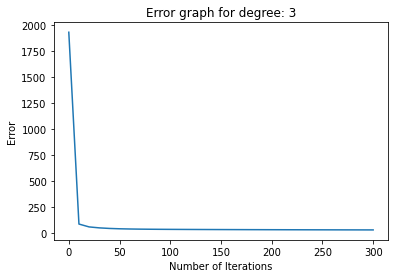

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  4  is:   23.713179596688068

Error values after each 10 complete iterations : 
[1807.025638828481, 743.8639696023863, 377.53511896999066, 198.66940810071185, 111.0418089598991, 68.05995519240327, 46.927770738229306, 36.49098943141724, 31.291615067393227, 28.658815443780735, 27.28551655437815, 26.531939134423837, 26.08482290051024, 25.79068627920823, 25.574240516801403, 25.398469285587822, 25.245094986710264, 25.10502018242783, 24.97364984904638, 24.848601837817526, 24.728585922399894, 24.612854677130425, 24.500934194267625, 24.392491767389448, 24.287270631220487, 24.18505754869965, 24.08566650431385, 23.98893030999278, 23.894696112149685, 23.802822834986802, 23.713179596688068]


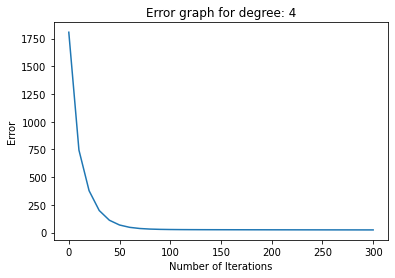

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  5  is:   35.923965593495964

Error values after each 10 complete iterations : 
[1606.318910594637, 596.0769388448599, 357.20421382103115, 249.35681244495584, 196.8719616420438, 168.23640471731815, 150.16596510332158, 137.03500713704787, 126.43794516594215, 117.32513496270414, 109.21978558000208, 101.88882478524971, 95.20440900132141, 89.08551128313053, 83.47315791222601, 78.31981564304465, 73.5847403883949, 69.23184687701477, 65.22865298835784, 61.5456899777726, 58.15612161421706, 55.03546310303412, 52.16135286249676, 49.51335644206641, 47.07279297313881, 44.82257928975184, 42.74708892656896, 40.83202414010894, 39.06429955637, 37.43193629711302, 35.923965593495964]


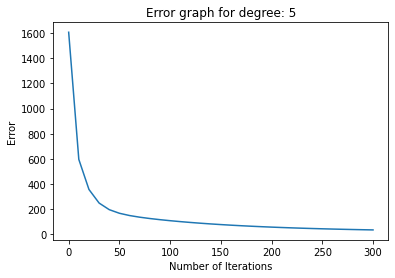

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  6  is:   22.896265638694764

Error values after each 10 complete iterations : 
[1091.1648742782554, 285.64228889992773, 126.65542167540224, 68.02958276556399, 45.92533517800249, 37.19996385066809, 33.416932164239086, 31.49600144286685, 30.30839131555795, 29.436778568047593, 28.723647416814195, 28.106733876012743, 27.55902706994212, 27.066854339890128, 26.621842523035166, 26.21793914511051, 25.85028223206483, 25.51474862116601, 25.207754041429652, 24.9261490164665, 24.667153315014357, 24.428307663676044, 24.20743459253835, 24.002605119726372, 23.812109781029037, 23.634433200852158, 23.468231682598095, 23.312313426140978, 23.165621051003047, 23.02721615063032, 22.896265638694764]


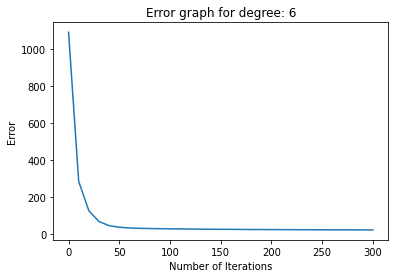

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  7  is:   60.55680099527716

Error values after each 10 complete iterations : 
[2783.3708502977197, 440.43394363309073, 230.05142000116683, 157.82993538949412, 130.05888680229108, 117.03427102041314, 109.21187097645861, 103.48137585548216, 98.79203225962821, 94.75765759338958, 91.21102649435643, 88.06088139285607, 85.24549958885866, 82.71714641467561, 80.43647521343381, 78.37018800065998, 76.48981366036114, 74.77090970762406, 73.19245693028931, 71.73636518361943, 70.3870572411501, 69.13111410271513, 67.95697127846044, 66.85465825567049, 65.81557484517971, 64.83229912210248, 63.898422465755914, 63.00840785486879, 62.157468124208776, 61.341461357795595, 60.55680099527716]


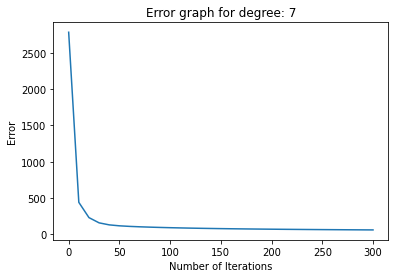

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  8  is:   26.077230749177755

Error values after each 10 complete iterations : 
[1011.3806969289524, 156.72048481920163, 78.0971151312284, 53.89750364836371, 45.26863935814712, 41.28855044599373, 38.846300195366595, 37.03122411232761, 35.55645877711239, 34.31533703341013, 33.25601337064363, 32.345572687454606, 31.55937624678877, 30.877588086988396, 30.283796567322508, 29.764290219342588, 29.3075724799639, 28.903989582744966, 28.545428725603415, 28.22506814652843, 27.937168667271337, 27.676899363346234, 27.440191616180996, 27.2236168587776, 27.024284129030946, 26.839754192875848, 26.66796753410116, 26.507183952239842, 26.355931880602807, 26.212965845894615, 26.077230749177755]


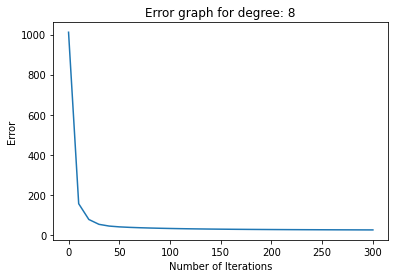

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error at the end of iteration of degree  9  is:   21.322758144166812

Error values after each 10 complete iterations : 
[763.9784652093715, 232.0468765290525, 186.72345687258039, 153.8183002397699, 128.17861379555455, 107.7214193943379, 91.27194264070475, 78.0092644947758, 67.30342789579927, 58.654851831364226, 51.663118838517065, 46.00621689605059, 41.424913397204875, 37.71044341296735, 34.694662986946014, 32.24213662184468, 30.243769615904274, 28.61168123431521, 27.275076281655725, 26.17692045201338, 25.271262888324024, 24.521079913962062, 23.89653845610072, 23.373597446485732, 22.932881399434432, 22.55877318078541, 22.238683299479092, 21.962461361752688, 21.721922018090726, 21.51046312029983, 21.322758144166812]


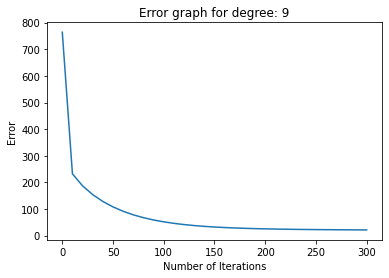

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Degree  9  gives minimum error.


In [7]:
#For training data

minError = 100000
minErrorDeg = -1

x_axis=[]
for i in range(iter_scaled):
    x_axis.append(i*skip_num)

    
for i in range(10):

    GD_Error = GD(i, train_X, train_y, 0.1 , iter_value)
    if(GD_Error <= minError):
        minError = GD_Error
        minErrorDeg = i

    error_list = error_array[i].tolist()  
    print("\nError values after each 10 complete iterations : ")
    print(error_list)
    
    plt.plot(x_axis, error_list)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Error')
    title = "Error graph for degree: " + str(i)
    plt.title(title)
    plt.show()
    print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    
    error_list=error_array[i].tolist()
    
print("Degree ", minErrorDeg, " gives minimum error.")      


In [8]:
def Predict_GD(deg, X, y, iterations):
                
    for itr in range(iterations):
        sumItrError = 0
        
        for z in range(len(X)):    # for each row in input data
            row = X.iloc[z]              # contains strength, temperature
            column = y.iloc[z]        # contains pressure
            dotP_wx = 0                 # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dotP_wx += coeff_list[deg][m][n] * (row[0]**m) * (row[1]**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dotP_wx -= column[0]                    # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
            sumItrError +=  (dotP_wx**2)*0.5  
            
        if(itr == iterations - 1):
            print("Error of last iteration of degree ", deg, " :  " ,sumItrError)
            
    return sumItrError

In [9]:
# for testing data

minError = 100000
minErrorDeg = -1
print("Testing errors for various degrees are as follows:")

for i in range(10):
    SGD_Error = Predict_GD(i, test_X, test_y, iter_value)    
    if(SGD_Error <= minError):
        minError = SGD_Error
        minErrorDeg = i
        
print("Degree ", minErrorDeg, " gives minimum error. \nTesting error = ", minError) 

Testing errors for various degrees are as follows:
Error of last iteration of degree  0  :   30.569986394557116
Error of last iteration of degree  1  :   23.493945020214937
Error of last iteration of degree  2  :   27.61670038105999
Error of last iteration of degree  3  :   12.009345167492313
Error of last iteration of degree  4  :   11.324952729191045
Error of last iteration of degree  5  :   16.837032771437087
Error of last iteration of degree  6  :   10.613791021591052
Error of last iteration of degree  7  :   28.23081792462061
Error of last iteration of degree  8  :   11.942962942268105
Error of last iteration of degree  9  :   9.862725764550282
Degree  9  gives minimum error. 
Testing error =  9.862725764550282
